In [1]:
!pip install kagglehub
import os
import kagglehub
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import RMSprop

In [2]:
path = f'{kagglehub.dataset_download("pernavjain/object-dataset")}'

Using Colab cache for faster access to the 'object-dataset' dataset.


In [3]:
print(path)

/kaggle/input/object-dataset


In [4]:
!ls {path}

sampleSubmission.csv  test  train  trainLabels.csv


In [5]:
filenames = os.listdir(f'{path}/train/train')
labels_df = pd.read_csv(f'{path}/trainLabels.csv')
print(labels_df["label"].unique().tolist())
labels_df[labels_df['id'] == 7796]

['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship', 'cat', 'dog', 'airplane']


,id,label
7795,7796,frog


In [6]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]
id_list = list(labels_df['id'])

In [8]:
train_data_folder = f'{path}/train/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [9]:
X = np.array(data)
Y = np.array(labels)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

In [11]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [13]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.trainable = False

num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 144s 124ms/step - accuracy: 0.2170 - loss: 2.3804 - val_accuracy: 0.4648 - val_loss: 1.5990
Epoch 2/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 119s 113ms/step - accuracy: 0.3265 - loss: 1.9404 - val_accuracy: 0.5056 - val_loss: 1.4441
Epoch 3/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 118s 112ms/step - accuracy: 0.3758 - loss: 1.7805 - val_accuracy: 0.5285 - val_loss: 1.3637
Epoch 4/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 119s 112ms/step - accuracy: 0.4045 - loss: 1.6905 - val_accuracy: 0.5451 - val_loss: 1.3312
Epoch 5/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 118s 112ms/step - accuracy: 0.4267 - loss: 1.6188 - val_accuracy: 0.5616 - val_loss: 1.2767
Epoch 6/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 118s 112ms/step - accuracy: 0.4500 - loss: 1.5666 - val_accuracy: 0.5776 - val_loss: 1.2462
Epoch 7/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 118s 112ms/step - accuracy: 0.4657 - loss: 1.5181 - val_accuracy: 0.5779 - val_loss: 1.2211
Epoch 8/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 118s 112ms/step - ac

In [17]:
model.save('/content/object_classifier.h5')

In [15]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.5713 - loss: 1.2434
Test Accuracy = 0.5822399854660034


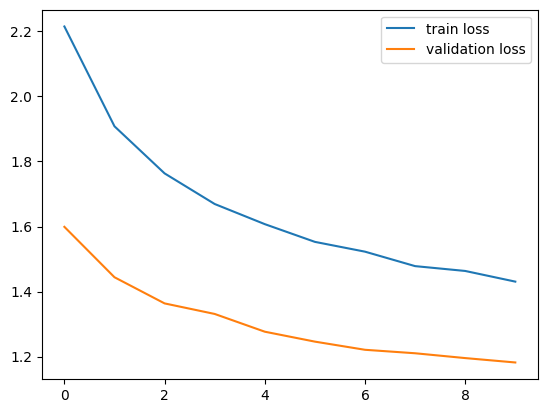

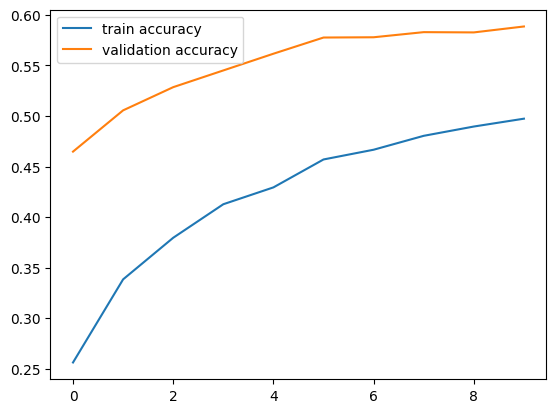

In [16]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()